# CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = sns.load_dataset('iris')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
122,7.7,2.8,6.7,2.0,virginica
46,5.1,3.8,1.6,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
124,6.7,3.3,5.7,2.1,virginica
10,5.4,3.7,1.5,0.2,setosa
115,6.4,3.2,5.3,2.3,virginica
89,5.5,2.5,4.0,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
50,7.0,3.2,4.7,1.4,versicolor


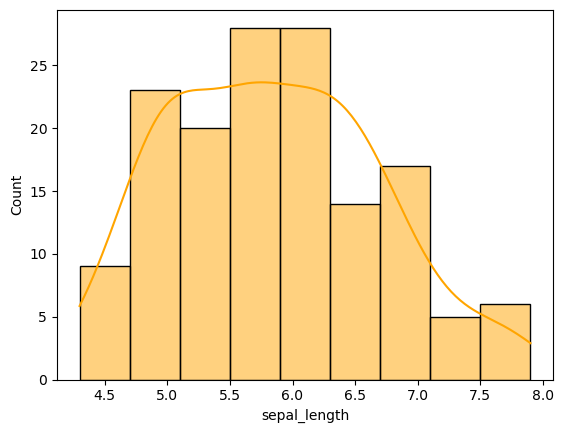

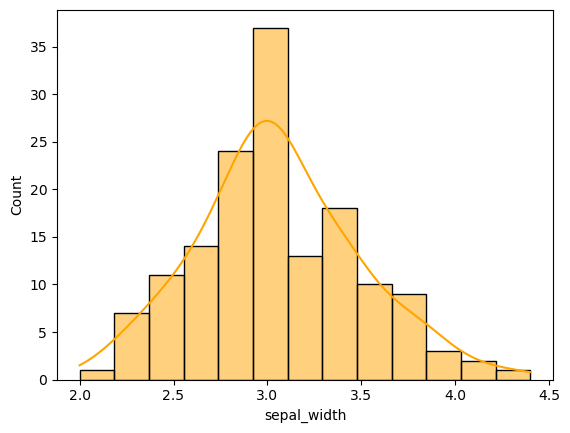

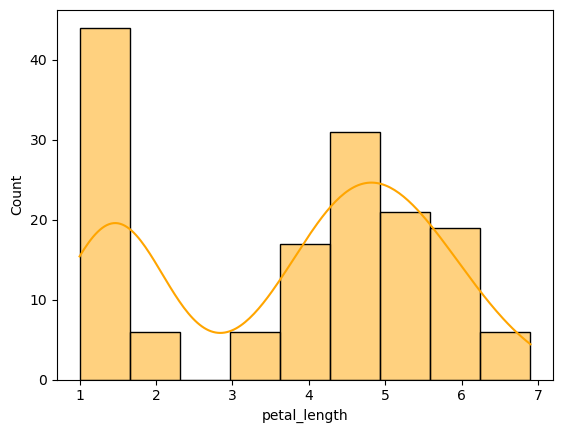

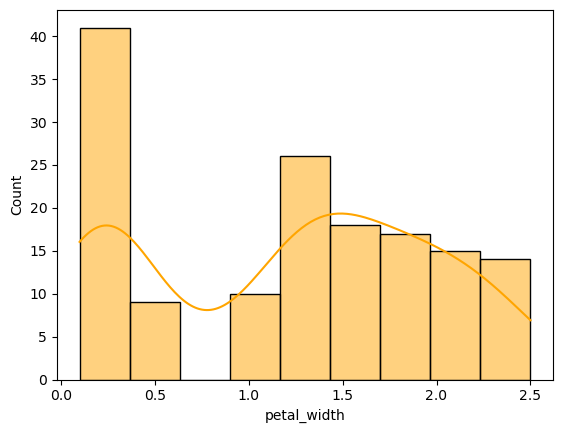

In [3]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="orange")
        plt.show()

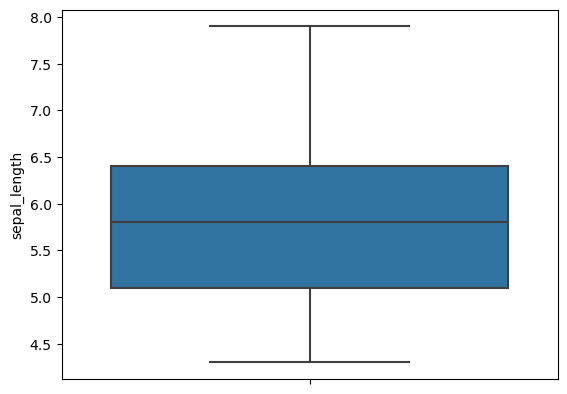

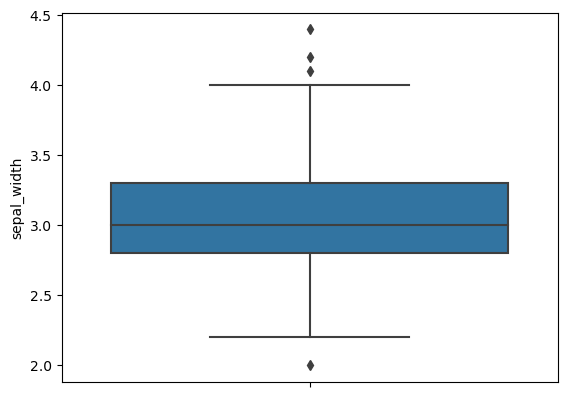

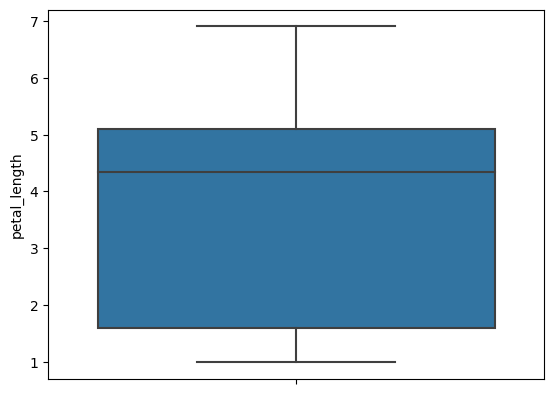

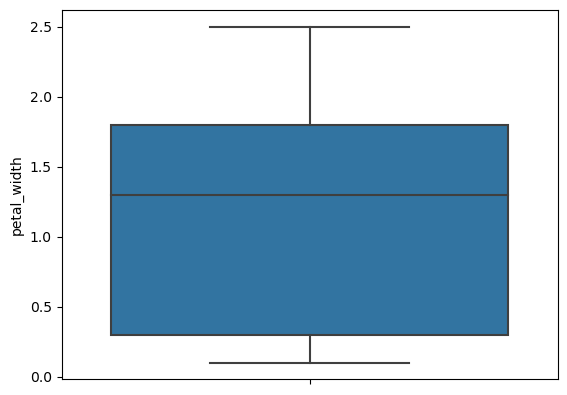

In [4]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [5]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL,LL 

In [6]:
for column in df.columns:
    if df[column].dtype !="object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | df[column]<LL,np.nan,df[column])

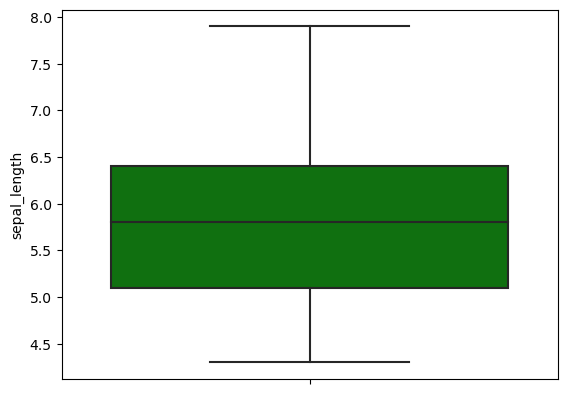

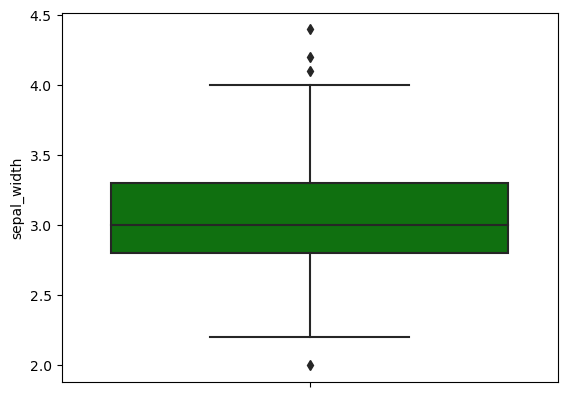

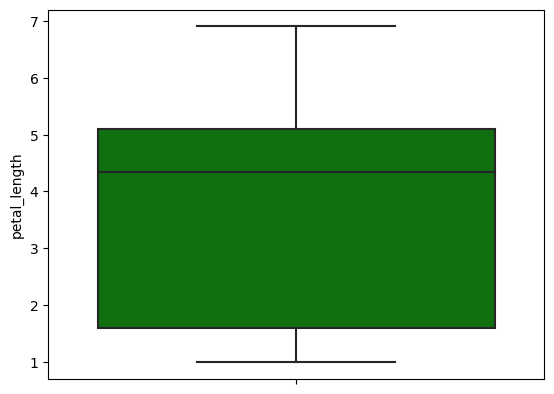

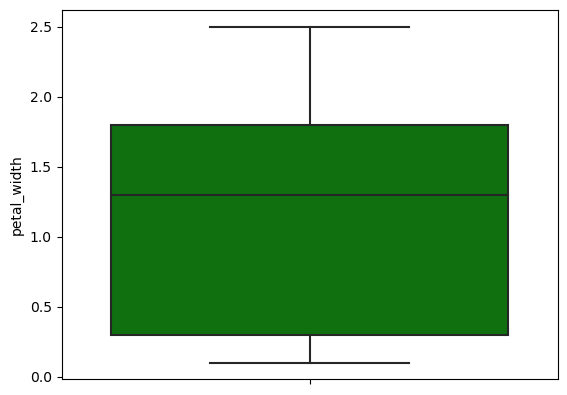

In [7]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="green")
        plt.show()

In [8]:
df.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [9]:
df.dropna(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
le = LabelEncoder()

In [12]:
df['species'] = le.fit_transform(df['species'])

In [13]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,2
68,6.2,2.2,4.5,1.5,1
145,6.7,3.0,5.2,2.3,2
64,5.6,2.9,3.6,1.3,1
2,4.7,3.2,1.3,0.2,0
57,4.9,2.4,3.3,1.0,1
81,5.5,2.4,3.7,1.0,1
50,7.0,3.2,4.7,1.4,1
71,6.1,2.8,4.0,1.3,1
7,5.0,3.4,1.5,0.2,0


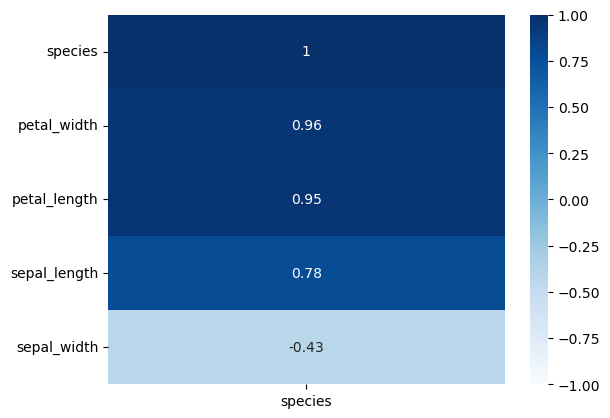

In [14]:
sns.heatmap(df.corr()[["species"]].sort_values(by="species", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

##  slecting features by iloc method:

In [15]:
x = df.iloc[:,:-1].values

In [16]:
y = df.iloc[:, -1].values

In [17]:
sc = StandardScaler()

In [18]:
x = sc.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [20]:
model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.9583333333333334
Model accuracy on test is::  1.0
confusion_matrix train is::  [[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]
confusion_matrix test is::  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Wrong Predictions made: 0 / 30
************************************************************


In [25]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [26]:
df1 = sns.load_dataset('iris')
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
OUTPUT.sample(30)

,ACTUAL,PREDICTION
148,2,2
40,0,0
131,2,2
104,2,2
139,2,2
79,1,1
50,1,1
146,2,2
134,2,2
8,0,0


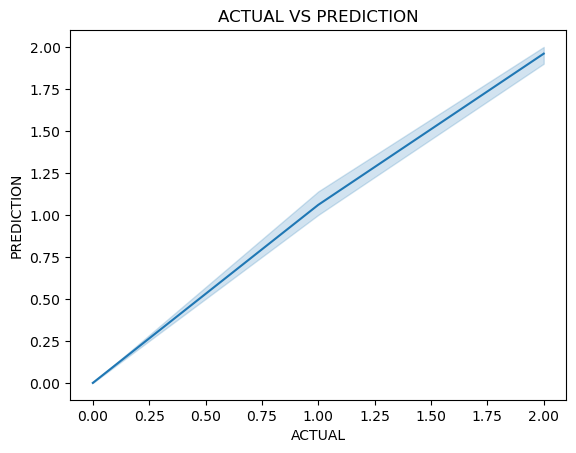

In [29]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()